### Import Libraries


In [1]:
import numpy as np

# Import pandas
import pandas as pd

# Core scverse libraries
import scanpy as sc
import anndata as ad

# Gerard's libraries
from src.uniprot_client import UniprotClient

# Data retrieval
import pooch

# import seaborn
import seaborn as sns

import matplotlib.pyplot as plt


/Users/gerardfont/Documents/Gerard/Master_BiomedicalDataScience/00_Master_THESIS/code/pyMSpro/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


___
### Config

In [2]:
TRANSLATE_PROTEIN_ID = True

---
### Load the Data

In [3]:
# Load the data (Scanpy assumes that your columns are genes and your rows are cells)
data_src = "./data/spetch/proteins-processed.csv"
data = pd.read_csv(data_src, delimiter=",")

# Remove the last column
data = data.iloc[:, :-1]

# Transpose the data
data = data.T

# Keep the first row as the column names
proteins = data.iloc[0]

# Remove the first column
data = data.iloc[1:]

print(data)

# Create an AnnData object with the data
adata = ad.AnnData(data.astype(np.float32))

proteins = proteins.to_numpy()
adata.var['proteins'] = proteins

print(adata)


           0         1         2         3         4         5         6     \
i4    -0.013661  0.138751  0.548971  0.053928 -0.169109 -0.294304   -0.5013   
i5    -0.182464  0.538382 -0.224704 -0.381163  0.154295  0.611411 -0.081458   
i7     0.129773 -0.358238  0.501321  0.075328 -0.149596  -0.27469  0.189266   
i10    0.089402  -0.10123 -0.146524  0.297088  0.147458  0.117292  0.073311   
i11    0.057113 -0.106888 -0.403847 -0.030037  0.035783 -0.271956  0.440847   
...         ...       ...       ...       ...       ...       ...       ...   
i2763  0.243409  0.319634 -0.107036 -0.279031  0.042667  0.149959  -0.52892   
i2764  0.146884 -0.245888 -0.051962  0.052548 -0.078345 -0.368327   0.23883   
i2765  0.071428  0.450251 -0.015908  0.111813 -0.441047 -0.033911 -0.287062   
i2766 -0.039085  0.471335 -0.131983 -0.197843  0.033375  0.144589 -0.447393   
i2767  0.209776 -0.251196  0.864086 -0.136493 -0.083653 -0.517552  0.555461   

           7         8         9     ...      3032 

/Users/gerardfont/Documents/Gerard/Master_BiomedicalDataScience/00_Master_THESIS/code/pyMSpro/venv/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [4]:
# Load the anno.csv file with the cell type annotations
anno_src = "./data/spetch/cells.csv"
anno = pd.read_csv(anno_src, delimiter=",")

# Get the column names as cell IDs
cellID = anno.columns[1:]

# Transpose the data
anno = anno.T

celltypes = anno.loc[:, 0].values

# Remove the first element
celltypes = celltypes[1:]

# Create a new obs in the AnnData object with the cell type annotations 
adata.obs['cellID'] = cellID
adata.obs['celltype'] = celltypes



In [5]:
print(adata)
print("---")
print(adata.X)

AnnData object with n_obs × n_vars = 1490 × 3042
    obs: 'cellID', 'celltype'
    var: 'proteins'
---
[[-0.01366062  0.13875137  0.5489709  ...  0.04277383 -0.19088827
  -0.08314212]
 [-0.18246402  0.5383824  -0.22470355 ...  0.12382649  0.17967343
   0.43699035]
 [ 0.12977307 -0.35823777  0.5013207  ... -0.02942673  0.1776448
  -0.39915815]
 ...
 [ 0.07142757  0.45025098 -0.01590803 ... -0.08510985  0.02331777
  -0.11183907]
 [-0.03908541  0.47133476 -0.13198255 ...  0.1802387  -0.01453104
   0.02132908]
 [ 0.20977622 -0.2511958   0.8640855  ...  0.06773125  0.11957133
   0.23990701]]


---
### Convert Protein ID to Gene names

In [6]:
if TRANSLATE_PROTEIN_ID:
    # Convert proteins to gene names
    unipcl = UniprotClient()

    gene_names = unipcl.batch_translate_protein_ids(adata.var['proteins'])
    adata.var['gene_protein'] = [gene_names.get(i, i) for i in adata.var['proteins']]
    adata.var['gene'] = [i.split(' ')[0] for i in adata.var['gene_protein']]
    print(adata.var['proteins'])
    print(adata.var['gene_protein'])
    print(adata.var['gene'])


0       A0A075B6H9
1       A0A0B4J1V0
2       A0A0B4J237
3       A0A1B0GTH6
4       A0A1B0GUA6
           ...    
3037        Q9Y6R9
3038        Q9Y6U7
3039        Q9Y6W6
3040        Q9Y6X6
3041        Q9Y6Z7
Name: proteins, Length: 3042, dtype: object
0       IGLV4-69 (A0A075B6H9)
1       IGHV3-15 (A0A0B4J1V0)
2        TRAV8-2 (A0A0B4J237)
3       CSNKA2IP (A0A1B0GTH6)
4        CCDC195 (A0A1B0GUA6)
                ...          
3037          CCDC61 (Q9Y6R9)
3038          RNF215 (Q9Y6U7)
3039          DUSP10 (Q9Y6W6)
3040           MYO16 (Q9Y6X6)
3041         COLEC10 (Q9Y6Z7)
Name: gene_protein, Length: 3042, dtype: object
0       IGLV4-69
1       IGHV3-15
2        TRAV8-2
3       CSNKA2IP
4        CCDC195
          ...   
3037      CCDC61
3038      RNF215
3039      DUSP10
3040       MYO16
3041     COLEC10
Name: gene, Length: 3042, dtype: object


In [7]:
adata_back = adata.copy()

---
### PCA & UMAP



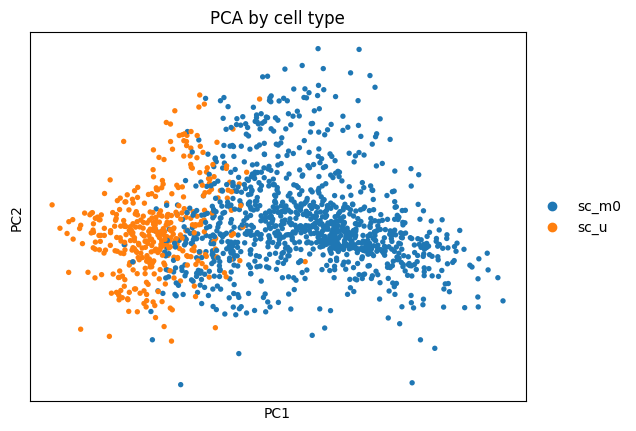

In [8]:
# PCA by cell type
sc.tl.pca(adata)
sc.pl.pca(adata, color='celltype', size=60, title='PCA by cell type')


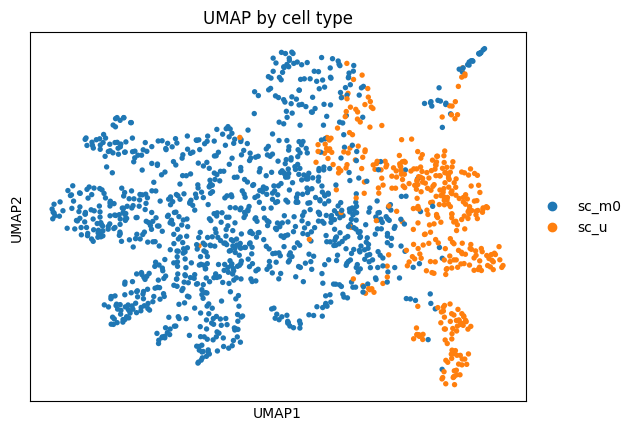

In [9]:
# UMAP by cell type
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color='celltype', size=60, title='UMAP by cell type')


---

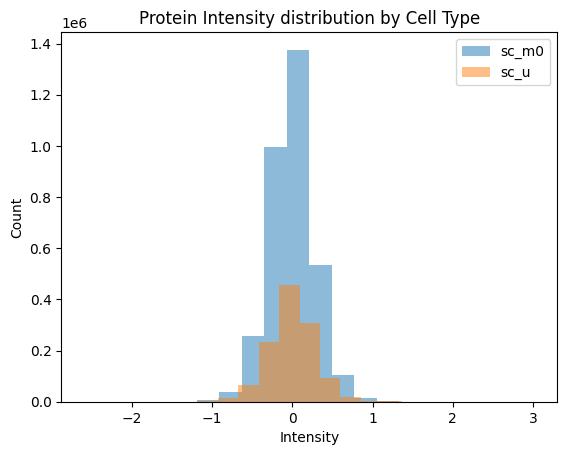

In [10]:
num_bins = 20

for celltype in adata.obs['celltype'].unique():
    plt.hist(adata[adata.obs['celltype'] == celltype].X.flatten(), bins=num_bins, alpha=0.5, label=celltype)

plt.xlabel('Intensity')
plt.ylabel('Count')
plt.title('Protein Intensity distribution by Cell Type')

plt.legend()
plt.show()


/Users/gerardfont/Documents/Gerard/Master_BiomedicalDataScience/00_Master_THESIS/code/pyMSpro/venv/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:645: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


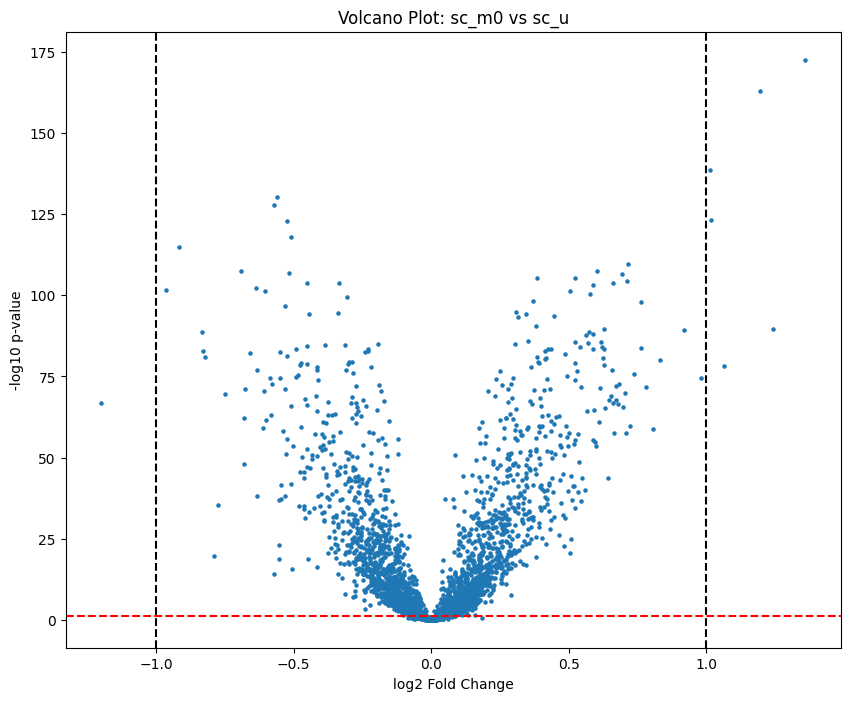

In [76]:

# Shift the matrix values so that all are positive
min_value = adata.X.min()
if min_value < 0:
    adata.X += np.abs(min_value) + 1  # Shift values to ensure they're all positive

# Filter to keep only the two groups you're interested in
group_1 = 'sc_m0'
group_2 = 'sc_u'

# Create a mask to filter the two groups
mask = adata.obs['celltype'].isin([group_1, group_2])
adata_filtered = adata[mask, :]

# Perform rank_genes_groups to find differentially expressed proteins between the two groups
sc.tl.rank_genes_groups(adata_filtered, 'celltype', groups=[group_1], reference=group_2, method='wilcoxon')

# Get log fold change and p-values
log2_fc = adata_filtered.uns['rank_genes_groups']['logfoldchanges'][group_1]  # Log2 fold changes
p_values = adata_filtered.uns['rank_genes_groups']['pvals'][group_1]          # p-values


# Convert p-values to -log10 for the volcano plot
log_p_values = -np.log10(p_values)

# Step 4: Create the volcano plot
volcano_data = pd.DataFrame({
    'log2_FC': log2_fc,
    '-log10_p_value': log_p_values
})

# Plotting the volcano plot
plt.figure(figsize=(10, 8))
plt.scatter(volcano_data['log2_FC'], volcano_data['-log10_p_value'], s=5)

# Add vertical lines to mark fold change threshold
plt.axvline(x=1, color='black', linestyle='--')  # Fold change threshold
plt.axvline(x=-1, color='black', linestyle='--')  # Fold change threshold

# Add horizontal lines to mark significance (e.g., p-value threshold)
plt.axhline(y=-np.log10(0.05), color='red', linestyle='--')  # p-value threshold

plt.xlabel('log2 Fold Change')
plt.ylabel('-log10 p-value')
plt.title(f'Volcano Plot: {group_1} vs {group_2}')

plt.show()


### Experiments


In [ ]:
# Assuming adata is your AnnData object containing the intensity matrix
adata.X += 10  # Add a constant to ensure non-negativity
adata.X = adata.X / adata.X.max() * 1000  # Scale to a maximum count of 1000

# Sample from Poisson distribution to simulate count data
adata.X = np.random.poisson(adata.X)

adata.X = np.log2(adata.X + 1)  # Add 1 to avoid log of zero

In [ ]:
# Differential expression analysis
sc.tl.rank_genes_groups(adata, groupby='celltype', method='t-test')
sc.pl.rank_genes_groups(adata)

In [ ]:
print(result)

In [ ]:

# Extract results
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
group1 = groups[0]
group2 = groups[1]

# Create DataFrame for easier handling
df = pd.DataFrame({
    'protein': result['names'][group1],
    f'logFC_{group1}': result['logfoldchanges'][group1],
    f'logFC_{group2}': result['logfoldchanges'][group2],
    f'pval_{group1}': result['pvals'][group1],
    f'pval_{group2}': result['pvals'][group2],
    f'pval_adj_{group1}': result['pvals_adj'][group1],
    f'pval_adj_{group2}': result['pvals_adj'][group2],
    f'score_{group1}': result['scores'][group1],
    f'score_{group2}': result['scores'][group2]
})

# Filter out entries with NaN log fold changes
df_filtered = df.dropna(subset=[f'logFC_{group1}', f'logFC_{group2}'])

# Print the filtered DataFrame
print(df_filtered.head())


In [ ]:

# Extract results for volcano plot
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pvals_adj = result['pvals_adj'][groups[0]]
logfoldchanges = result['logfoldchanges'][groups[0]]
gene_names = result['names'][groups[0]]

# Create DataFrame for plotting
volcano_df = pd.DataFrame({
    'protein': gene_names,
    'logFC': logfoldchanges,
    'p-adj': pvals_adj
})

# Volcano plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=volcano_df, x='logFC', y=-np.log10(volcano_df['p-adj']),
                hue=np.log10(volcano_df['p-adj']) < -np.log10(0.05), palette={True: 'red', False: 'grey'}, legend=None)
plt.axhline(-np.log10(0.05), linestyle='--', color='black')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 Adjusted P-Value')
plt.title('Volcano Plot')


plt.show()

# Clustering and dendrogram
sc.tl.dendrogram(adata, groupby='celltype')
sc.pl.dendrogram(adata, groupby='celltype')

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Extract results
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pvals_adj = result['pvals_adj'][groups[0]]
logfoldchanges = result['logfoldchanges'][groups[0]]
gene_names = result['names'][groups[0]]

# Create DataFrame for plotting
volcano_df = pd.DataFrame({
    'protein': gene_names,
    'logFC': logfoldchanges,
    'p-adj': pvals_adj
})

# Volcano plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=volcano_df, x='logFC', y=-np.log10(volcano_df['p-adj']),
                hue=np.log10(volcano_df['p-adj']) < -np.log10(0.05), palette={True: 'red', False: 'grey'}, legend=None)
plt.axhline(-np.log10(0.05), linestyle='--', color='black')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 Adjusted P-Value')
plt.title('Volcano Plot')
plt.show()

In [ ]:
# Differential expression analysis with optional sparse matrix conversion
#sc.tl.rank_genes_groups(adata, groupby='celltype', method='t-test')
sc.tl.rank_genes_groups(adata, 'celltype', method='wilcoxon')
# to visualize the results
sc.pl.rank_genes_groups(adata)

In [ ]:
# Perform differential expression analysis
sc.tl.rank_genes_groups(adata, groupby='celltype', method='t-test')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract results
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pvals_adj = result['pvals_adj'][groups[0]]
logfoldchanges = result['logfoldchanges'][groups[0]]
gene_names = result['names'][groups[0]]

# Create DataFrame for plotting
volcano_df = pd.DataFrame({
    'protein': gene_names,
    'logFC': logfoldchanges,
    'p-adj': pvals_adj
})

# Volcano plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=volcano_df, x='logFC', y=-np.log10(volcano_df['p-adj']),
                hue=np.log10(volcano_df['p-adj']) < -np.log10(0.05), palette={True: 'red', False: 'grey'}, legend=None)
plt.axhline(-np.log10(0.05), linestyle='--', color='black')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 Adjusted P-Value')
plt.title('Volcano Plot')
plt.show()


In [ ]:
# Clustering
sc.tl.dendrogram(adata, groupby='celltype')

# Plot dendrogram
sc.pl.dendrogram(adata, groupby='celltype')
